In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width: 40% !important; height: 40% !important;} </style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv("titanic/train.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [10]:
X = pd.get_dummies(X)

In [11]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [12]:
X.Age.median()

28.0

In [13]:
X = X.fillna({"Age": X.Age.median()})

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Check the results

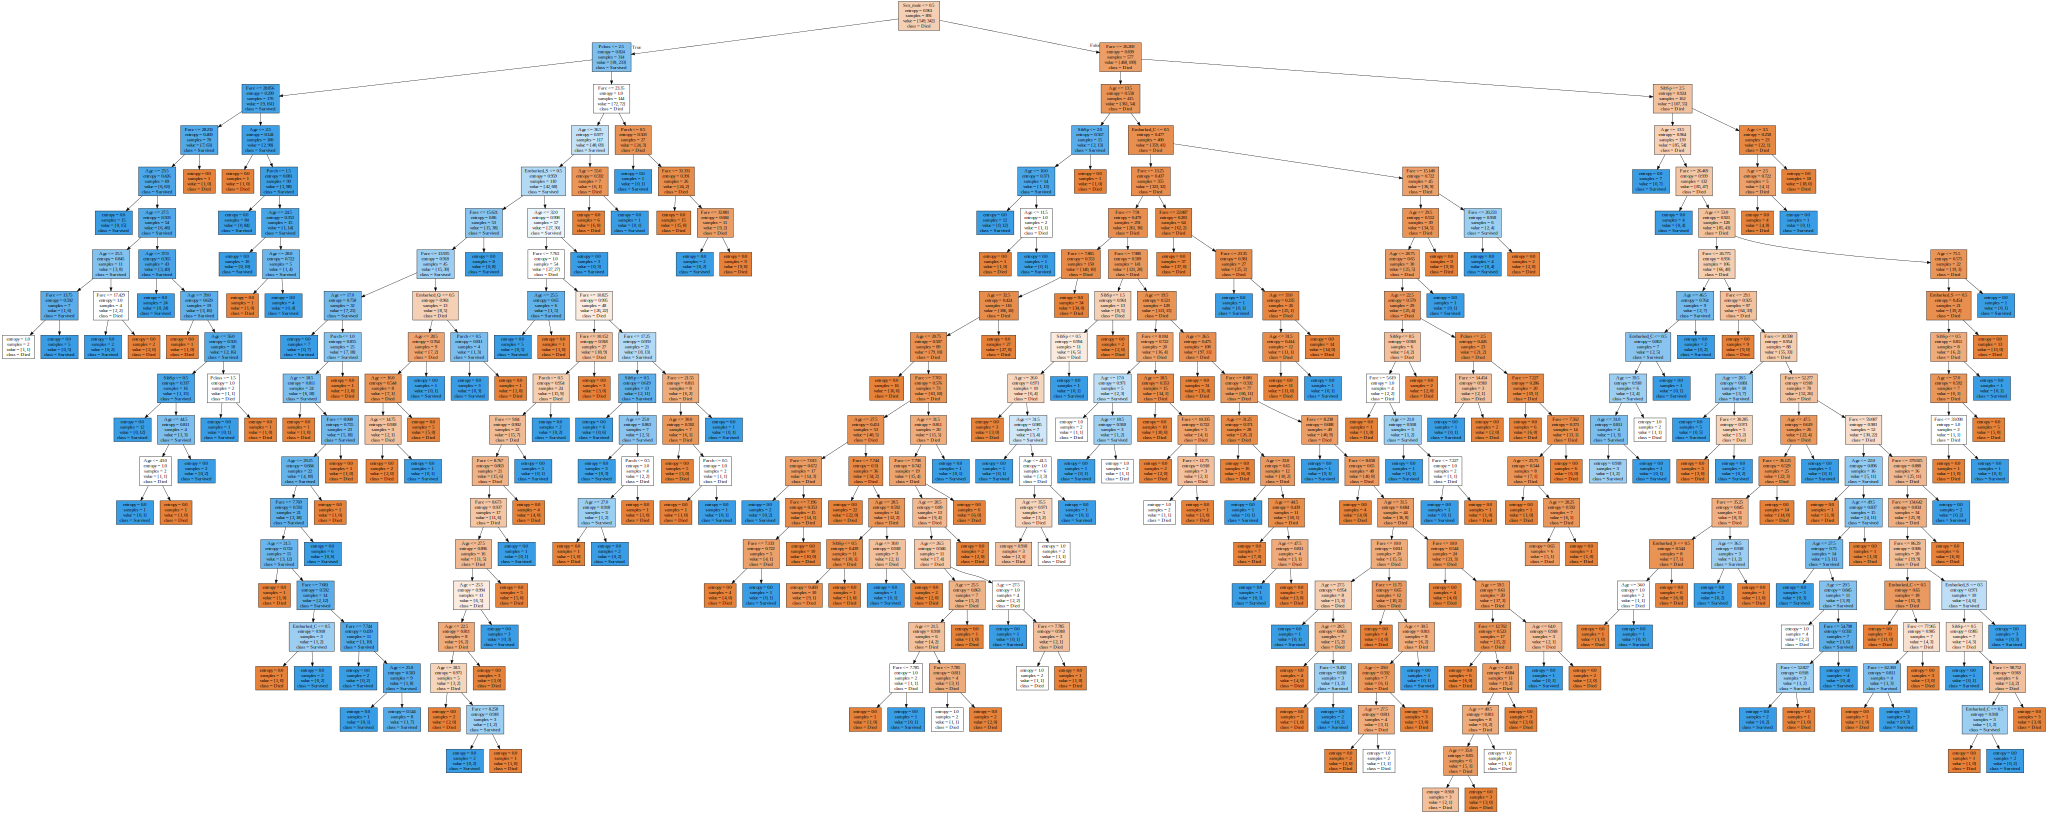

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),\
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [19]:
clf.score(X, y)

0.9797979797979798

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
clf.score(X_test, y_test)

0.7661016949152543

In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
clf.score(X_train, y_train)

0.8238255033557047

In [25]:
clf.score(X_test, y_test)

0.8203389830508474

### Let's experiment with a tree max_depth

In [26]:
max_depth_values = range(1, 100)

In [27]:
scores_data = pd.DataFrame()

In [36]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score = pd.DataFrame({"max_depth":[max_depth], "train_score": [train_score], "test_score" : [test_score],\
                              "cross_val_score": [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score)

In [37]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [38]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score', 'cross_val_score'],
                           var_name = 'set_type', value_name = 'score')

In [39]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


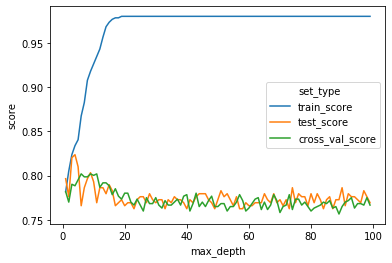

In [40]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

### Cross-validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [32]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8237288135593219

Now we go up to max_depth loop and add cross-validation there. Then

In [41]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.802031
207,10,cross_val_score,0.800350


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
clf = tree.DecisionTreeClassifier()

In [44]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30)}

In [45]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [46]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [48]:
best_clf = grid_search_cv_clf.best_estimator_

In [49]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [50]:
from sklearn.metrics import precision_score, recall_score

In [51]:
y_pred = best_clf.predict(X_test)

In [52]:
precision_score(y_test, y_pred)

0.8023255813953488

In [53]:
recall_score(y_test, y_pred)

0.575

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)

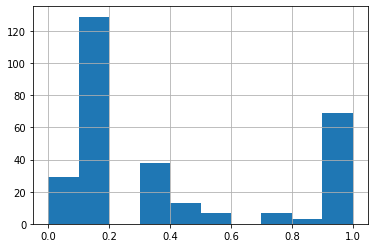

In [55]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [56]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0) 

In [57]:
precision_score(y_test, y_pred)

0.8611111111111112

In [58]:
recall_score(y_test, y_pred)

0.5166666666666667

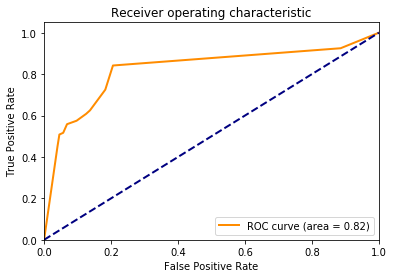

In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [67]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

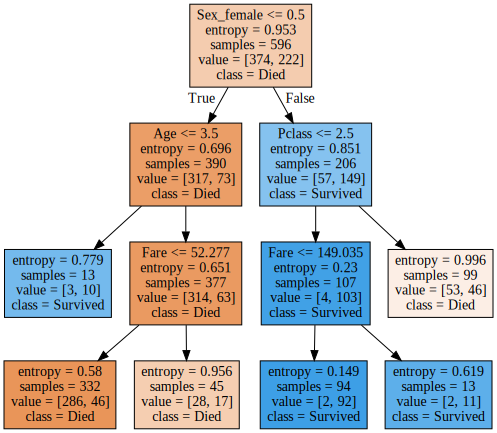

In [68]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),\
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

### Introducing random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf_rf = RandomForestClassifier()

In [71]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [72]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [73]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [74]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [ ]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [75]:
best_clf = grid_search_cv_clf.best_estimator_

In [76]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [77]:
feature_importances = best_clf.feature_importances_

In [78]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                        'feature_importances':feature_importances})

In [81]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.216706
6,Sex_male,0.184514
4,Fare,0.183981
1,Age,0.155094
0,Pclass,0.113988
3,Parch,0.049453
2,SibSp,0.041915
9,Embarked_S,0.026209
7,Embarked_C,0.020481
8,Embarked_Q,0.007659
